In [1]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('shrutimehta/zomato-restaurants-data', unzip = True, path ='.')

Dataset URL: https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data


In [599]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 
import re 
%matplotlib inline

In [3]:
df = pd.read_csv('zomato.csv', encoding='latin-1')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Investigating Missing Values and Duplicate values

In [8]:
# Understanding how many null values we have
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df[df['Cuisines'].isna()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


<Axes: >

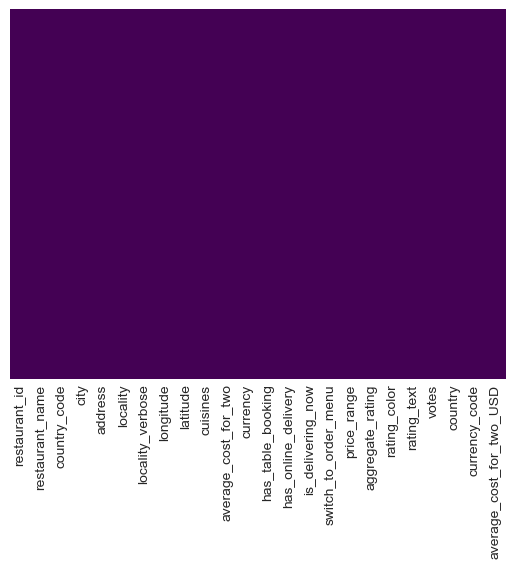

In [186]:
# If there was a significant amount of null values a heatmap is a useful way to visualise it 
sns.heatmap(final_df.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

We can see we only have 9 missing values in cuisines. Now checking for duplicates.

In [10]:
# Check for duplicates
print('Amount of duplicate rows:',len(df[df.duplicated()]))

Amount of duplicate rows: 0


# Merge Two Datasets

In [11]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [473]:
# We want to merge the two dataframes on the country code column and keep the df table (left)
final_df = pd.merge(df, df_country, on = 'Country Code', how = 'left')

In [474]:
pd.set_option('display.max_columns', 22)

In [475]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Renaming Columns 
I prefer to work with column names which are all lowercase and joined by '_'

In [476]:
final_df.columns = final_df.columns.str.lower().str.replace(' ', '_')

# Data Types 

In [477]:
print('Types before conversion:',final_df.dtypes)

Types before conversion: restaurant_id             int64
restaurant_name          object
country_code              int64
city                     object
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking        object
has_online_delivery      object
is_delivering_now        object
switch_to_order_menu     object
price_range               int64
aggregate_rating        float64
rating_color             object
rating_text              object
votes                     int64
country                  object
dtype: object


In [478]:
def calculate_memory_usage(df_input: pd.DataFrame) -> pd.Series: 
    '''Function to calculate memory usage of each column'''
    memory_usage = df_input.memory_usage(deep=True) 
    return memory_usage 

In [479]:
# Record initial memory usage
initial_memory = calculate_memory_usage(final_df)
print('--- Initial Memory Consuption ---\n', initial_memory)

--- Initial Memory Consuption ---
 Index                       132
restaurant_id             76408
restaurant_name          693924
country_code              76408
city                     624274
address                 1064139
locality                 679894
locality_verbose         778878
longitude                 76408
latitude                  76408
cuisines                 734354
average_cost_for_two      76408
currency                 713419
has_table_booking        564667
has_online_delivery      565960
is_delivering_now        563543
switch_to_order_menu     563509
price_range               76408
aggregate_rating          76408
rating_color             599132
rating_text              611462
votes                     76408
country                  597464
dtype: int64


In [480]:
def map_to_bool(df: pd.DataFrame)-> pd.DataFrame: 
    '''Input in dataframe and columns to map to boolean values'''
    return df.map({'Yes': True, 'No': False}) # Map Yes to True, No to False

In [481]:
# Convert certain columns to booleans
columns_to_convert = [
    'has_table_booking',
    'has_online_delivery',
    'is_delivering_now',
    'switch_to_order_menu'
]    
final_df[columns_to_convert] = final_df[columns_to_convert].apply(map_to_bool)

In [482]:
# Map columns to string and category types
mapping_type_conversion = {
    'restaurant_name':'string',
    'address': 'string',
    'locality':'string', 
    'locality_verbose':'string',
    'cuisines':'string', 
    'rating_color': 'category',
    'rating_text':'category',
    'currency':'category',
    'city':'category',
    'country':'category'
}
final_df = final_df.astype(mapping_type_conversion)

In [483]:
# Types after conversion
print('Types after conversion:\n',final_df.dtypes)

Types after conversion:
 restaurant_id                    int64
restaurant_name         string[python]
country_code                     int64
city                          category
address                 string[python]
locality                string[python]
locality_verbose        string[python]
longitude                      float64
latitude                       float64
cuisines                string[python]
average_cost_for_two             int64
currency                      category
has_table_booking                 bool
has_online_delivery               bool
is_delivering_now                 bool
switch_to_order_menu              bool
price_range                      int64
aggregate_rating               float64
rating_color                  category
rating_text                   category
votes                            int64
country                       category
dtype: object


In [484]:
def calculate_percentage_diff(initial:pd.Series,final:pd.Series)-> pd.Series:
    '''Returns percentage difference between the two pandas series'''
    return (final-initial)/initial *100

In [485]:
# Calculate final memory usage
final_memory = calculate_memory_usage(final_df)
# Calculate percentage change
memory_reduction_percent = calculate_percentage_diff(
    initial = initial_memory,
    final = final_memory
)
# Print memory reduction 
print('---Memory Reduction Percentage--\n',memory_reduction_percent)

---Memory Reduction Percentage--
 Index                    0.000000
restaurant_id            0.000000
restaurant_name          0.000000
country_code             0.000000
city                   -94.772167
address                  0.000000
locality                 0.000000
locality_verbose         0.000000
longitude                0.000000
latitude                 0.000000
cuisines                 0.039218
average_cost_for_two     0.000000
currency               -98.492471
has_table_booking      -98.308561
has_online_delivery    -98.312425
is_delivering_now      -98.305187
switch_to_order_menu   -98.305085
price_range              0.000000
aggregate_rating         0.000000
rating_color           -98.314228
rating_text            -98.347076
votes                    0.000000
country                -98.143821
dtype: float64


# Map of Restaurant Locations 

# Questions to answer
## Univariate Analysis 
1. What countries have the most restaurants listed on Zomato
2. How many restaurants offer delivery
3. What is the average cost, and delivery of cost for two 
4. What is the average rating of restaurant

### 1. Representing the amount of restaurant reviews for each country

In [486]:
plt.style.use('seaborn-v0_8-whitegrid')

In [487]:
country_grp = final_df.groupby('country', observed = True).agg({'country':'count'})

In [488]:
country_grp = country_grp.rename(columns={'country':'count'}).sort_values(by='count', ascending = False)
country_grp = country_grp.reset_index()

In [489]:
# Top 10 countries that use Zomato
country_grp.head(10)

,country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,South Africa,60
5,UAE,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


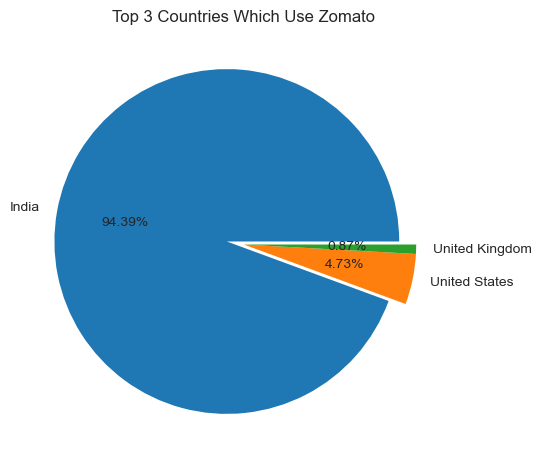

In [490]:
# Top 3 countries which use Zomato 
plt.pie(
    x = country_grp['count'][:3],
    labels = country_grp['country'][:3],
    explode = [0.1,0,0],
    autopct = '%0.2f%%'
)
plt.title('Top 3 Countries Which Use Zomato', pad = 5)
plt.tight_layout()
plt.show()

Observation: 
- Majority of transactions/records are from India and few in the US and UK 

In [491]:
city_grp = final_df.groupby('city', observed = True).agg({'city': 'count'}).rename(
    columns={'city':'count'}
)
city_grp = city_grp.sort_values(by = 'count',ascending=False)
city_grp.head(10)

,count
city,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Lucknow,21
Amritsar,21
Ahmedabad,21


Observation: 
- Dominance of New Delhi, India's capital in terms of restaurant density
- There is a dramatic drop off in restaurant numbers after Noida indicating a large disparity between the top cities and the others on the list.

### 2. How many restaurants offer delivery?

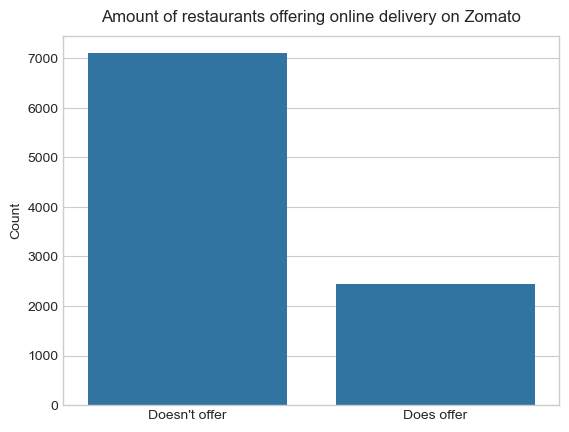

In [492]:
sns.countplot(data = final_df, x = 'has_online_delivery')
plt.xticks(ticks = [False,True], labels=['Doesn\'t offer', 'Does offer'])
plt.xlabel(None)
plt.ylabel('Count')
plt.title('Amount of restaurants offering online delivery on Zomato', pad =10)
plt.show()

Observation: 
- Majority of restaurants do not offer delivery

### 3. What is the average cost, and delivery of cost for two 
- Issue: Currency is not standardised
- Solution: Standardise results to USD; get current exchange rates and create function to convert

In [493]:
# See all unique currencies 
list(final_df['currency'].unique())

# Use ChatGPT to generate a mapping (to currency code) for each of these values
currency_mapping = {
    'Botswana Pula(P)': 'BWP',
    'Brazilian Real(R$)': 'BRL',
    'Dollar($)': 'USD',
    'Emirati Diram(AED)': 'AED',
    'Indian Rupees(Rs.)': 'INR',
    'Indonesian Rupiah(IDR)': 'IDR',
    'NewZealand($)': 'NZD',
    'Pounds(\x8c£)': 'GBP',
    'Qatari Rial(QR)': 'QAR',
    'Rand(R)': 'ZAR',
    'Sri Lankan Rupee(LKR)': 'LKR',
    'Turkish Lira(TL)': 'TRY'
}
# Apply currency mapping 
final_df['currency_code'] = final_df['currency'].map(currency_mapping)

In [494]:
list(final_df['currency_code'].unique())

['BWP',
 'BRL',
 'USD',
 'AED',
 'INR',
 'IDR',
 'NZD',
 'GBP',
 'QAR',
 'ZAR',
 'LKR',
 'TRY']

For this I used an API, you can create your own api key 
'url = 'https://v6.exchangerate-api.com/v6/YOUR-API-KEY-HERE/latest/USD'

In [495]:
import requests

In [496]:
# Using ExchangeRate-Api to get current exchange rates where USD is base currency
url = 'https://v6.exchangerate-api.com/v6/eaa0fad84b5325872d0abf53/latest/USD'

# Making our request
response = requests.get(url)
exchange_data = response.json()

# Your JSON object
print(exchange_data)

{'result': 'success', 'documentation': 'https://www.exchangerate-api.com/docs', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1723593601, 'time_last_update_utc': 'Wed, 14 Aug 2024 00:00:01 +0000', 'time_next_update_unix': 1723680001, 'time_next_update_utc': 'Thu, 15 Aug 2024 00:00:01 +0000', 'base_code': 'USD', 'conversion_rates': {'USD': 1, 'AED': 3.6725, 'AFN': 70.8154, 'ALL': 91.3573, 'AMD': 388.4397, 'ANG': 1.79, 'AOA': 888.4694, 'ARS': 940.33, 'AUD': 1.5112, 'AWG': 1.79, 'AZN': 1.7004, 'BAM': 1.7825, 'BBD': 2.0, 'BDT': 117.4753, 'BGN': 1.7832, 'BHD': 0.376, 'BIF': 2883.9228, 'BMD': 1.0, 'BND': 1.32, 'BOB': 6.9191, 'BRL': 5.495, 'BSD': 1.0, 'BTN': 83.9318, 'BWP': 13.5019, 'BYN': 3.2659, 'BZD': 2.0, 'CAD': 1.3721, 'CDF': 2845.2311, 'CHF': 0.8656, 'CLP': 933.9761, 'CNY': 7.1558, 'COP': 4063.5743, 'CRC': 528.4112, 'CUP': 24.0, 'CVE': 100.4925, 'CZK': 22.9915, 'DJF': 177.721, 'DKK': 6.7939, 'DOP': 59.6449, 'DZD': 134.5052, 'EGP': 49.3639, 'ERN': 15.

In [497]:
# Extract conversion rates, gives as dictionary
conversion_rates = exchange_data['conversion_rates']

In [498]:
def convert_to_usd(cost: float,currency: pd.Categorical,conversion_rates: dict) -> float: 
    '''Takes input of cost for two, currency code for row, and conversion rates 
    and calculates the cost in USD'''
    curr_rate = conversion_rates.get(currency,1) # Find current conversion rate
    if cost: 
        return cost / curr_rate
    else:
        return np.nan

In [499]:
final_df['average_cost_for_two_USD'] = final_df.apply(
    lambda row: convert_to_usd(
        row['average_cost_for_two'],
        row['currency_code'],
        conversion_rates
    ),
    axis = 1
)

In [500]:
final_df['average_cost_for_two_USD'].describe()

count    9533.000000
mean       10.079747
std        16.898102
min         0.595693
25%         3.574156
50%         5.956927
75%        10.000000
max       500.000000
Name: average_cost_for_two_USD, dtype: float64

Observations: 
- Average cost in USD for a meal for two is 10 USD, 5 USD per person
- The std is quite high at 16 USD; further investigation needed to determine if this is 
because of location or quality of restaurant or both
- The median is low at nearly 6 USD; median being lower than the mean suggests that the average cost may be skewed by large outliers 
- 75% of cost of meals for two is 10 USD or less; still relatively inexpensive, clear that there must be large outliers at play.

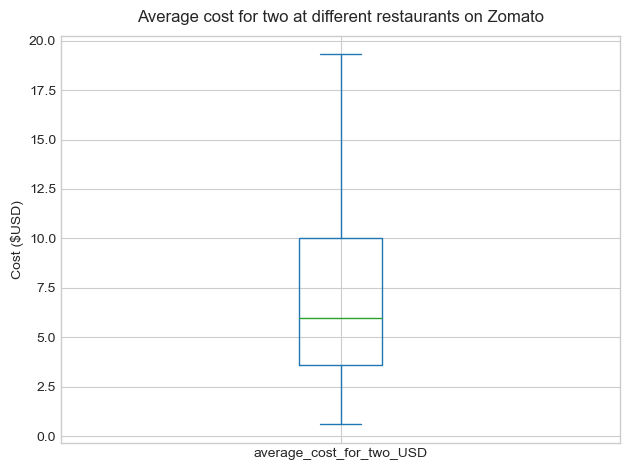

In [501]:
# Box plot of average cost for two with outliers removed 
final_df.plot(kind = 'box', y = 'average_cost_for_two_USD', showfliers = False)
plt.ylabel('Cost ($USD)')
plt.title('Average cost for two at different restaurants on Zomato',pad = 10)
plt.tight_layout()
plt.show()

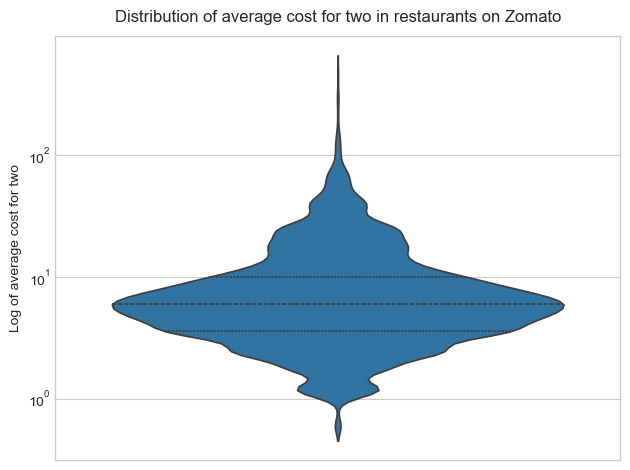

In [502]:
sns.violinplot(
    data = final_df,
    y='average_cost_for_two_USD',
    inner = 'quartz', 
    log_scale= True
)
plt.ylabel('Log of average cost for two')
plt.title('Distribution of average cost for two in restaurants on Zomato', pad = 10)
plt.tight_layout()
plt.show()

Observations: 
- Reconfirms suspicions that data for average cost for two is being heavily skewed by higher priced outliers

### 4. What is the average rating of restaurant
Issue: Restaurants which are not rated have an aggregate rating of 0, gives the distributions a right skew.
Solution: Temporarily remove restaurants which are not rated from the dataset

In [503]:
# Only look at restaurants which are rated 
rated_df = final_df.query("rating_text != 'Not rated'")

In [504]:
# Rating is between 0-5 stars 
rated_df['aggregate_rating'].describe()

count    7403.000000
mean        3.440024
std         0.552195
min         1.800000
25%         3.000000
50%         3.400000
75%         3.800000
max         4.900000
Name: aggregate_rating, dtype: float64

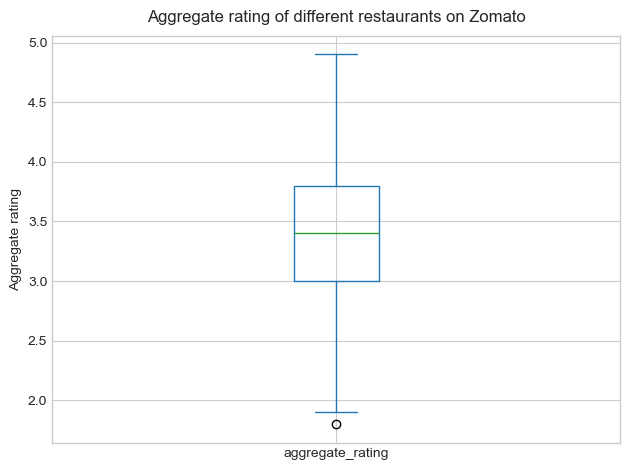

In [505]:
rated_df.plot(kind = 'box', y ='aggregate_rating')
plt.ylabel('Aggregate rating')
plt.title('Aggregate rating of different restaurants on Zomato',pad = 10)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Disribution of aggregate ratings on Zomato')

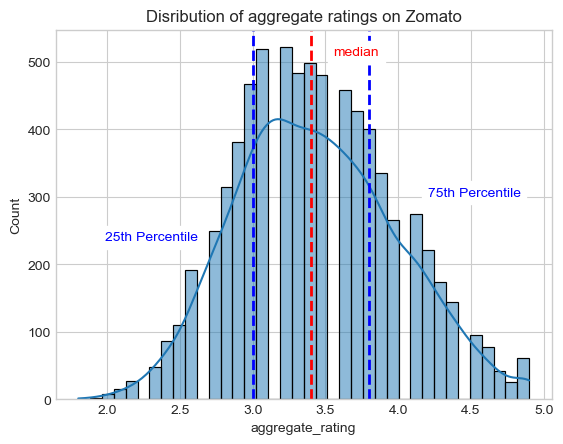

In [506]:
# Histogram with KDE 
ax = sns.histplot(data = rated_df, x = 'aggregate_rating', kde = True, )

plt.axvline(rated_df['aggregate_rating'].median(), linestyle = 'dashed', linewidth = 2, color = 'red')
plt.text(0.56,0.93,'median',transform=ax.transAxes, color = 'red',  bbox ={'color':'white'})

plt.axvline(rated_df['aggregate_rating'].quantile(0.25), linestyle = 'dashed', linewidth = 2, color = 'blue')
plt.text(0.1,0.43,'25th Percentile',transform=ax.transAxes, color = 'blue', bbox ={'color':'white'})

plt.axvline(rated_df['aggregate_rating'].quantile(0.75), linestyle = 'dashed', linewidth = 2, color = 'blue')
plt.text(0.75,0.55,'75th Percentile',transform=ax.transAxes, color = 'blue', bbox ={'color':'white'})

plt.title('Disribution of aggregate ratings on Zomato')

Observations: 
- Normal distribution of results, slight right skew
- Most restuarants (> 75%) are 3 stars or above 
- Some low rated outliers
- No restaurant has 5 star rating 
- Fairly large standard deviation of 0.55 

### Question 5: Most common cuisines
Issue: Some restaurants have multiple cuisines

Solution: 
- I needed a dictionairy which would add the key if the key was not found 
- For this I found the collections module with the method defaultdict
- I stripped the string of white space and split the cuisine of a restaurant into a list if it contained commas
- Every time this cuisine came up in the defaultdict it was incrememneted by 1 

In [507]:
from collections import defaultdict

In [508]:
def extract_cuisine(df: pd.DataFrame, column_name: str) -> pd.DataFrame: 
    ''' A function to extract all cuisines mentioned for every restaurant and 
    add it to a dictionairy which would increment at each occurance '''
    # Initialize a default dict, when a key is initialized value set to 0
    cuisine_count = defaultdict(int) 
    for cuisines in df[column_name]: # Iterate through each cuisine for restaurant
        if pd.notna(cuisines):
            # Create a list containing cuisines mentioned for singular restaurant
            cuisines_list = [x.strip() for x in cuisines.split(',')]
            for cuisine in cuisines_list: # Iterate through each cuisine in list 
                # Incremenet count on each occurance of cuisine on list
                cuisine_count[cuisine] += 1 
    cuisine_df = pd.DataFrame(list(cuisine_count.items()), columns=['cuisine', 'count'])
    return cuisine_df

# Order by popularity
cuisine_popularity = extract_cuisine(final_df, 'cuisines').sort_values(
    by = 'count',
    ascending = False
)

In [509]:
# Top 10 most popular cuisines on Zomato 
top_10_cuisine = cuisine_popularity.head(10)
top_10_cuisine

,cuisine,count
81,North Indian,3960
9,Chinese,2735
19,Fast Food,1986
82,Mughlai,995
15,Italian,764
17,Bakery,745
71,Continental,736
14,Cafe,703
2,Desserts,653
84,South Indian,636


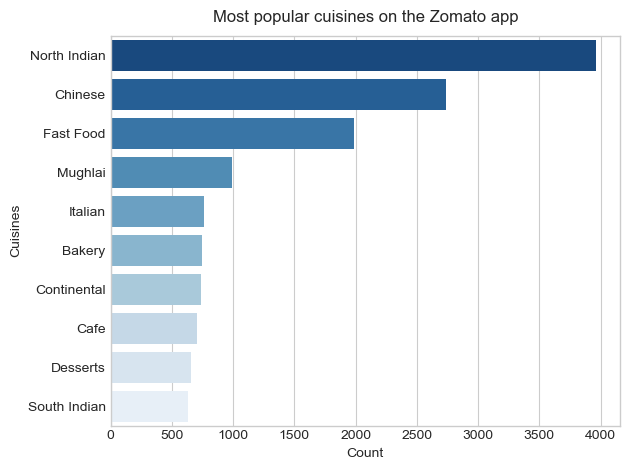

In [510]:
sns.barplot(
    data = top_10_cuisine,
    x = 'count', 
    y = 'cuisine', 
    hue = 'cuisine',
    orient = 'h',
    palette = 'Blues_r'
)
plt.ylabel('Cuisines')
plt.xlabel('Count')
plt.title('Most popular cuisines on the Zomato app', pad = 10)
plt.tight_layout()
plt.show()

Observations: 
- As expected considering 94% of restaurants are in India, the most popular cuisine is North Indian, South Indian cuisine seems to be less popular however this could be due to less restaurants in Southern parts of India (top 3 cities are in North India)
- Chinese was the second most popular food, suggesting that Chinese seems to be popular in India
- Italian was the most popular European cuisine |
- Breakfast cuisines (Bakery, Continental, Cafe) also appear to be popular 

## Bivariate & Multivariate Analysis
Questions: 
1. What is the relationship between aggregate rating, rating color and rating text
2. Correlation questions 
    - Is there a correlation between aggregate rating and cost of a restaurant 
    - Is there a correlation between a restaurant offering booking/delivery and its price
    - Is there a correlation between a restaurant offering booking/delivery and its rating
3. How does the average cost for two vary per country
4. Scatter plot of average cost USD against aggregate rating with a color bar representing the GDP of different countries
    - !! Heatmap of average rating for countries
5. Cities with the most and highest rated restaurants
6. !! Cuisines with the highest average rating (incl. only cuisines >10 occurances) and cuisines which are the most/least expensive (incl. only cuisines >10 occurances)

### Question 1: Correlation between aggregate rating, rating color and rating text

In [511]:
ratings = final_df.groupby(['aggregate_rating', 'rating_color', 'rating_text'], observed=True).size()

In [512]:
ratings = ratings.reset_index().rename(columns = {0:'rating_count'})

In [513]:
ratings

,aggregate_rating,rating_color,rating_text,rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Figure size 2500x700 with 0 Axes>

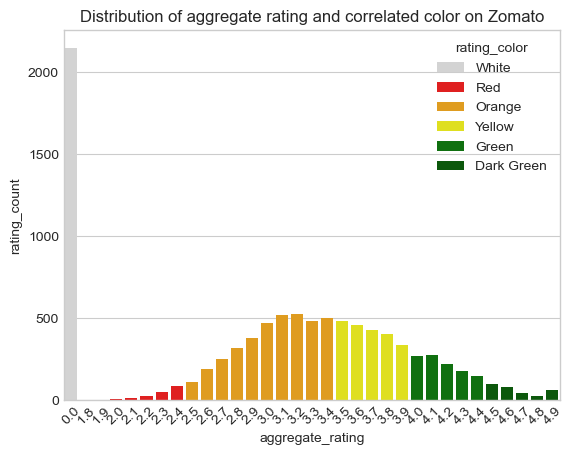

<Figure size 2500x700 with 0 Axes>

In [514]:
 sns.barplot(
     data = ratings,
     x = 'aggregate_rating',
     y = 'rating_count',
     hue = 'rating_color',
     hue_order = ['White', 'Red', 'Orange', 'Yellow', 'Green','Dark Green'],
     palette =  {'White':'lightgrey', 'Red':'red', 'Orange':'orange','Yellow': 'yellow', 'Green':'green', 'Dark Green':'darkgreen'}
)
plt.title('Distribution of aggregate rating and correlated color on Zomato')
plt.tick_params(axis = 'x', rotation = 45)
plt.figure(figsize=(25,7))

Observations: 
- Rating color is white when not rated 
- Red and poor is associated with 1.8 to 2.4 (inclusive) 
- Orange and average is associated with 2.5 to 3.4 (inclusive)
- Yellow and good is associated with 3.5 to 3.9 (inclusive) 
- Green and very good is associated with 4-4.4 (inclusive) 
- Dark green and excellent is associated with 4.5-4.9 (inclusive) 

### Question 2: Correlation between certain variables

In [515]:
corr_spearman = final_df[['average_cost_for_two_USD','aggregate_rating','price_range','has_table_booking', 'has_online_delivery']].corr(method = 'spearman')

In [516]:
corr_pearson = final_df[['average_cost_for_two_USD','aggregate_rating','price_range','has_table_booking', 'has_online_delivery']].corr(method = 'pearson')

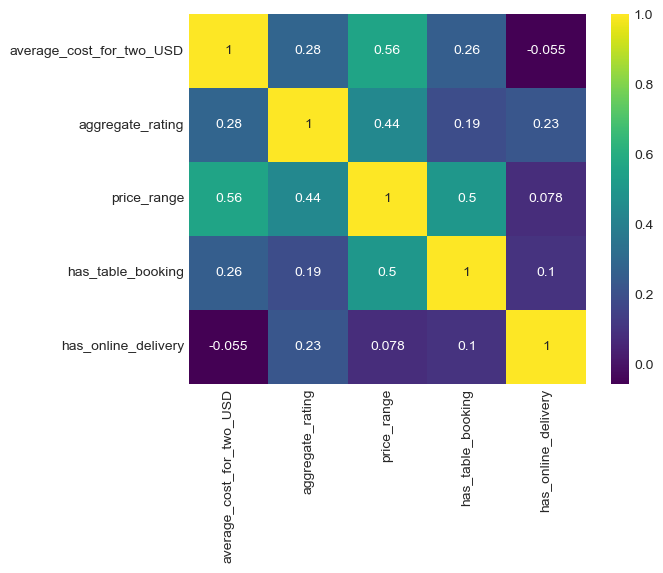

In [517]:
# Pearson correlation heatmap
sns.heatmap(corr_pearson, cmap = 'viridis',annot = True)
plt.show()

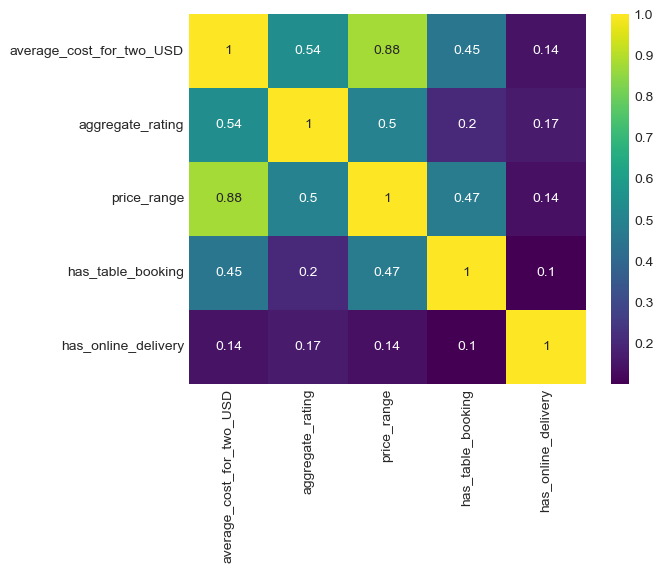

In [518]:
# Spearman correlation coeffcient 
sns.heatmap(corr_spearman, cmap = 'viridis',annot = True)
plt.show()

Observation:
- There is a strong positive monotonic relationship between price range and average cost for two (as expected)
- There appears to be a fairly strong positive monotonic relationship between average cost for two and aggregate rating; this also holds for aggregate rating and price range as expected
- There is a positive monotonic correlation between having a table booking and price range/average cost suggesting restaurants that tend to books cost more 
- There does not appear to be much of a correlation between the rating or cost of a restaurant and whether it offers delivery
- Nor is there a strong correlation between rating of restaurant and whether it offers a table booking

### Question 3: How does the average cost for two vary per country

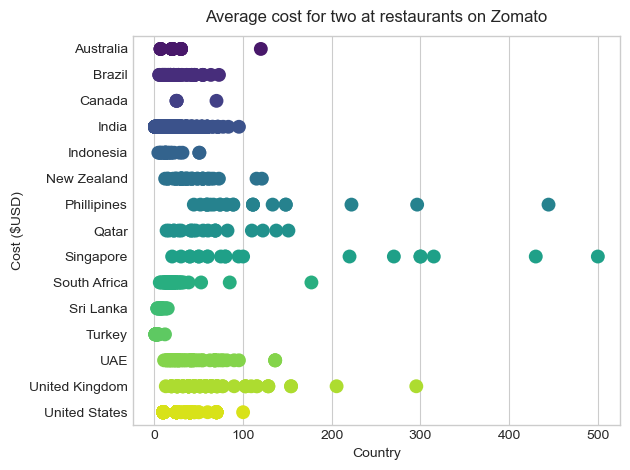

In [519]:
# Strip plot 
sns.stripplot(
    x='average_cost_for_two_USD',
    y='country', 
    hue = 'country',
    legend = False, 
    data=final_df, 
    palette='viridis', 
    size=10, 
    jitter = False
)
plt.title('Average cost for two at restaurants on Zomato', pad = 10)
plt.ylabel('Cost ($USD)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

### Question 4: Visualise how the aggregate rating and average cost for two correlate for each country 
- x-axis: aggregate rating (median per country)
- y-axis: average cost for two (median per country)
- hue: country (color is based of off gdp per capita ranking, 1 is highest)

In [520]:
# Few spelling erros/differences which fixing will allow us find corresponding gdp ranking
final_df['country'] = final_df['country'].replace({
    'Phillipines':'Philippines',
    'Turkey':'Turkey (Turkiye)',
    'UAE':'United Arab Emirates'
})

In [590]:
# Create data frame grouping by country, finds median of average cost and rating 
country_cost_rating = final_df.groupby(['country'], observed = False).agg(
    {'average_cost_for_two_USD':'median','aggregate_rating':'median'}
).reset_index()

In [591]:
'''
We want to add a new column to this df which will contain the gdp per capita rating...
'''
country_cost_rating.head(5)

,country,average_cost_for_two_USD,aggregate_rating
0,Australia,20.000000,3.70
1,Brazil,18.198362,4.15
2,Canada,25.000000,3.50
3,India,5.361234,3.10
4,Indonesia,12.666166,4.30


In [592]:
# Read in CIA 2024 gdp per capita ranking and extract country name and ranking
gdp_per_cap = pd.read_csv('gdp-per-capita.csv')[['name','ranking']]

In [593]:
gdp_per_cap.sample(5)

,name,ranking
111,Egypt,112
176,Tuvalu,177
8,Isle of Man,9
218,"Congo, Democratic Republic of the",219
60,Romania,61


In [594]:
def find_ranking(df: pd.DataFrame, country_col: str, gdp_data: pd.DataFrame) -> pd.Series:
    ''' 
    Goes through each country in dataframe and finds corresponding ranking in gdp dataframe.
    If the country does not exist (KeyError) return NaN
    Appends this ranking to a list and makes list a new column in dataframe
    '''
    gdp_ranking = []
    for country in df[country_col]: 
        try:
            ranking = gdp_data.loc[gdp_data['name'] == country,'ranking'].values[0]
            gdp_ranking.append(ranking)
        except(KeyError): 
            ranking = float('nan')
    df['GDP_ranking'] = pd.Series(gdp_ranking)
    return df

In [595]:
# Append row to group with ranking in it 
country_cost_rating = find_ranking(country_cost_rating, 'country', gdp_per_cap)

In [596]:
'''
Creating a color palette 
'''
# Set color palette 
palette = sns.color_palette("plasma", as_cmap=True)
# Normalize the color mapping, convert to 0-1
norm = plt.Normalize(min(country_cost_rating['GDP_ranking']), max(country_cost_rating['GDP_ranking']))
# Assign GDP to corresponding color
country_cost_rating['color'] = country_cost_rating['GDP_ranking'].map(lambda x: palette(norm(x)))

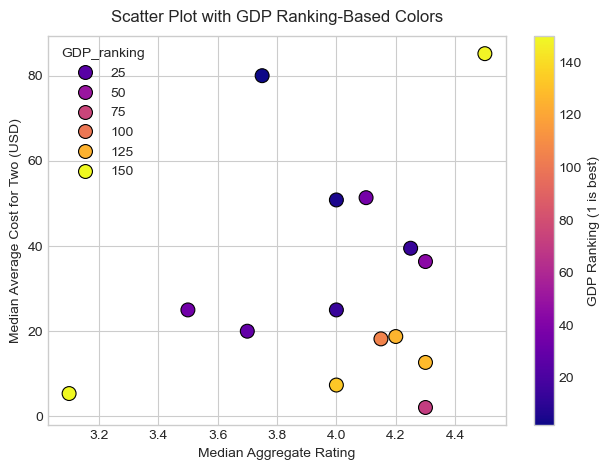

In [605]:
scatter = sns.scatterplot(
    data = country_cost_rating,
    x = 'aggregate_rating',
    y='average_cost_for_two_USD', 
    hue = 'GDP_ranking',
    palette=palette,
    s=100,
    edgecolor='black'
)
# Create a color bar for GDP Ranking
# Create a ScalarMappable object for the color bar
sm = mpl.cm.ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='GDP Ranking (1 is best)', ax = scatter)

plt.xlabel('Median Aggregate Rating')
plt.ylabel('Median Average Cost for Two (USD)')
plt.title('Scatter Plot with GDP Ranking-Based Colors', pad = 10)
plt.tight_layout()
plt.show()

Observations: 
- 

### Question 5: Cities with the most and highest rated restaurants
I used the product of the number of restaurants and the median rating as a way to find the cities with a high amount of high quality restaurants 

In [630]:
city_rating_grp = final_df.groupby('city', observed=True).agg({'city':'count', 'aggregate_rating':'median'})
city_rating_grp = city_rating_grp.rename(columns={'city':'count','aggregate_rating':'median_rating'})

In [631]:
city_rating_grp.sort_values(by = ['count', 'median_rating'], ascending = [False,False])

,count,median_rating
city,,
New Delhi,5473,3.1
Gurgaon,1118,3.2
Noida,1080,2.8
Faridabad,251,2.8
Ghaziabad,25,3.2
...,...,...
Consort,1,3.0
Mayfield,1,2.9
Paynesville,1,2.6


In [632]:
# Create a new column which multiplies the rating and the number of restaurants together 
city_rating_grp['product'] = city_rating_grp['count']*city_rating_grp['median_rating']

In [634]:
city_rating_grp.sort_values(by = 'product', ascending=False).head(10)

,count,median_rating,product
city,,,
New Delhi,5473,3.10,16966.3
Gurgaon,1118,3.20,3577.6
Noida,1080,2.80,3024.0
Faridabad,251,2.80,702.8
London,20,4.55,91.0
Rio de Janeiro,20,4.55,91.0
Tampa Bay,20,4.45,89.0
Ahmedabad,21,4.20,88.2
Lucknow,21,4.20,88.2


Observations: 

### Question 6: Top rated and most expensive cuisines: 
- Extract each occurance of a cuisine and find the average rating / average price for two USD for each cuisine  

In [856]:
def cuisine_info(df:pd.DataFrame,cuisine_col:str,info_col:str) -> dict:
    '''
    Input: dataframe, cuisine column name, column of interest name (e.g. 'aggregate_rating')
    For every instance of a cuisine within df, append the value from the column of interest to
    list in relevant key-value pair. Return dict with cuisine-info key-value pair.
    '''
    # Initilize empty dictionary, new keys initilize empty list for value  
    info_dict = defaultdict(list)
    for index, row in df.iterrows(): # Iterate through dateframe rows
        # If cuisine and column of interest is not empty...
        if pd.notna(row[cuisine_col]) & pd.notna(row[info_col]): 
            row_cuisine = [x.strip() for x in row[cuisine_col].split(',')] # Create list of cuisines for row
            for cuisine in row_cuisine: # Iterate through cuisine for row
                info_dict[cuisine].append(row[info_col]) # Locate key, append info
    return dict(info_dict)

In [857]:
cuisine_rating = cuisine_info(final_df, 'cuisines', 'aggregate_rating')
cuisine_price = cuisine_info(final_df, 'cuisines', 'average_cost_for_two_USD')

In [858]:
def average_of_value(dict_in: dict)-> dict: 
    '''
    Simple function to find the mean of each list in value of dictionary.
    '''
    dict_out = {}
    for key,value in dict_in.items(): 
        if value:
            dict_out[key] = (sum(value)/len(value))
        else:
            dict_out[key] = None 
    return dict_out

In [859]:
# Apply average of value function to rating and price dictionaries 
cuisine_rating = average_of_value(cuisine_rating)
cuisine_price = average_of_value(cuisine_price)

In [860]:
# Making dictionaries into dataframes
cuisine_rating = pd.DataFrame(list(cuisine_rating.items()), 
                              columns=['cuisine', 'average_rating']
)
cuisine_price = pd.DataFrame(list(cuisine_price.items()), 
                              columns=['cuisine', 'average_cost_for_two_USD']
)
# Merging them into one dataframe with left join
cuisine_df = pd.merge(cuisine_rating,cuisine_price, how = 'left', on='cuisine')

# Sort values by cuisine
cuisine_df = cuisine_df.sort_values(by='cuisine')

In [866]:
# Use earlier function, to extract count of cuisines and sort also by cuisine
cuisine_count = extract_cuisine(final_df,'cuisines').sort_values(by='cuisine')

# Merge on cuisine column again, left join
cuisine_df = pd.merge(cuisine_df,cuisine_count,how='left', on='cuisine')

In [891]:
# Sort by count
cuisine_df = cuisine_df.sort_values(by = 'count', ascending = False)

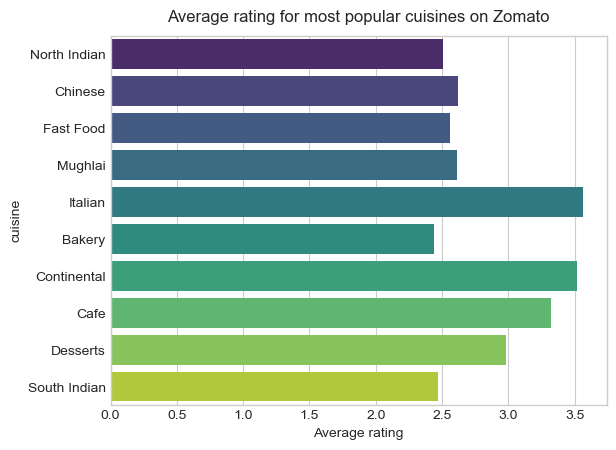

In [901]:
sns.barplot(
    data = cuisine_df.head(10),
    x = 'average_rating',
    y = 'cuisine',
    hue = 'cuisine', 
    palette='viridis',
    orient = 'h'
)
plt.xlabel('Average rating')
plt.title('Average rating for most popular cuisines on Zomato', pad = 10)
plt.show()

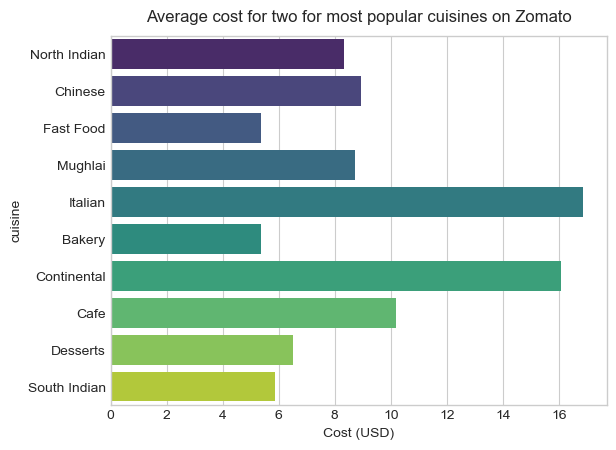

In [902]:
sns.barplot(
    data = cuisine_df.head(10),
    x = 'average_cost_for_two_USD',
    y = 'cuisine',
    hue = 'cuisine', 
    palette='viridis',
    orient = 'h'
)
plt.xlabel('Cost (USD)')
plt.title('Average cost for two for most popular cuisines on Zomato', pad = 10)
plt.show()

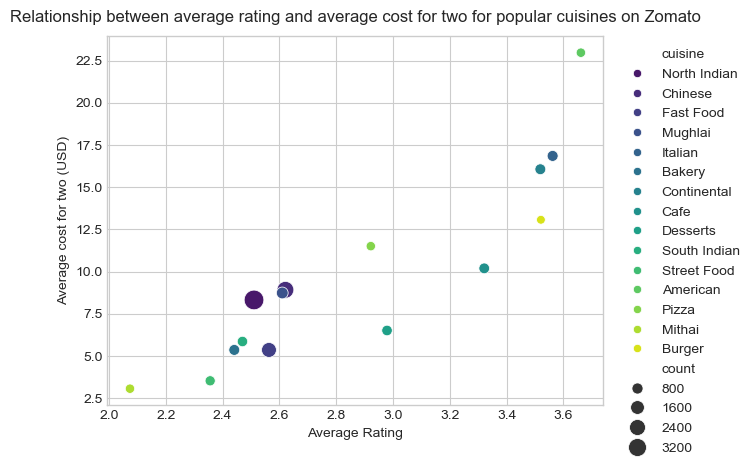

In [932]:
scatter = sns.scatterplot(
    data = cuisine_df.head(15),
    x = 'average_rating',
    y = 'average_cost_for_two_USD',
    hue = 'cuisine', 
    size = 'count',
    sizes = (40,200),
    palette='viridis'
)
plt.xlabel('Average Rating')
plt.ylabel('Average cost for two (USD)')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')  # Adjust legend position
plt.title('Relationship between average rating and average cost for two for popular cuisines on Zomato', pad=10)
plt.show()